In [5]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import json

In [6]:

#todo lr epoch decay get it from json (mlflow metrics updated)
reportedGithubValueF1=0.7176
dataset = 'RAPzs/'
attribute='hs-BaldHead'
dirTest1 = 'testBaldHeadSynNotChinesse/'
dirTest2 = 'testOKGithub/'
dirTest2 = 'testOKGithub2/'

pathToJson1 = dataset+dirTest1
pathToJson2 = dataset+dirTest2

pathToTestingOverall1 = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+pathToJson1+'/testing_metrics.json'
pathToTrainingOverall1 =  '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+pathToJson1+'/training_metrics.json'

pathToTestingOverall2 = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+pathToJson2+'/testing_metrics.json'
pathToTrainingOverall2 =  '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+pathToJson2+'/training_metrics.json'

tittle=dataset+' Training vs testing ma between executions'

fileTestingOverall1 = open(pathToTestingOverall1)
jsonTestingOverall1 = json.load(fileTestingOverall1)
fileTrainingOverall1 = open(pathToTrainingOverall1)
jsonTrainingOverall1 = json.load(fileTrainingOverall1)

fileTestingOverall2 = open(pathToTestingOverall2)
jsonTestingOverall2 = json.load(fileTestingOverall2)
fileTrainingOverall2 = open(pathToTrainingOverall2)
jsonTrainingOverall2 = json.load(fileTrainingOverall2)


lrDecay1 = 0.00001
lrEpochDecay1 = jsonTrainingOverall1['lr'].index(lrDecay1)

lrDecay2 = 0.00001
lrEpochDecay2 = 11

f1Key='ma'

listF1Testing1 = jsonTestingOverall1[f1Key]
listF1Training1 = jsonTrainingOverall1[f1Key]

listF1Testing2 = jsonTestingOverall2[f1Key]
listF1Training2 = jsonTrainingOverall2[f1Key]


def plotTrainingVsTesting(listTraining1, listTesting1, listTraining2, listTesting2, tittle, lrEpochDecay1, lrEpochDecay2, reportedValue):
    epochs=len(listTraining1)
    plt.plot(range(0,epochs), listTraining1, label='training ma execution 1')
    plt.plot(range(0,epochs), listTesting1, label='testing ma execution 1')

    plt.plot(lrEpochDecay1, listTraining1[lrEpochDecay1], 'o', color='r', label='learning decay epoch - '+str(lrEpochDecay1)+' - execution 1')
    plt.text(s=str(round(listTraining1[lrEpochDecay1],2)), x=lrEpochDecay1, y=listTraining1[lrEpochDecay1])
    
    plt.plot(lrEpochDecay1, listTesting1[lrEpochDecay1], 'o', color='r')
    plt.text(s=str(round(listTesting1[lrEpochDecay1],3)), x=lrEpochDecay1, y=listTesting1[lrEpochDecay1])


    epochs=len(listTraining2)
    plt.plot(range(0,epochs), listTraining2, label='training ma execution 2')
    plt.plot(range(0,epochs), listTesting2, label='testing ma execution 2')

    plt.plot(lrEpochDecay2, listTraining2[lrEpochDecay2], 'o', color='r', label='learning decay epoch - '+str(lrEpochDecay2)+' - execution 2')
    plt.text(s=str(round(listTraining2[lrEpochDecay2],3)), x=lrEpochDecay2, y=listTraining2[lrEpochDecay2]-0.02)
    
    plt.plot(lrEpochDecay2, listTesting2[lrEpochDecay2], 'o', color='r')
    plt.text(s=str(round(listTesting2[lrEpochDecay2],3)), x=lrEpochDecay2, y=listTesting2[lrEpochDecay2]-0.01)

    plt.plot(lrEpochDecay2, reportedValue, 'x', color='g', label='reported value')
    plt.text(s=str(reportedValue)+' github value', x=lrEpochDecay2, y=reportedValue-0.01)


    plt.xlabel('Epochs')
    plt.ylabel('Performance (ma)')
    plt.legend(bbox_to_anchor=(1.1, 1.05), title=tittle, fontsize='small', fancybox=True)
    plt.show()

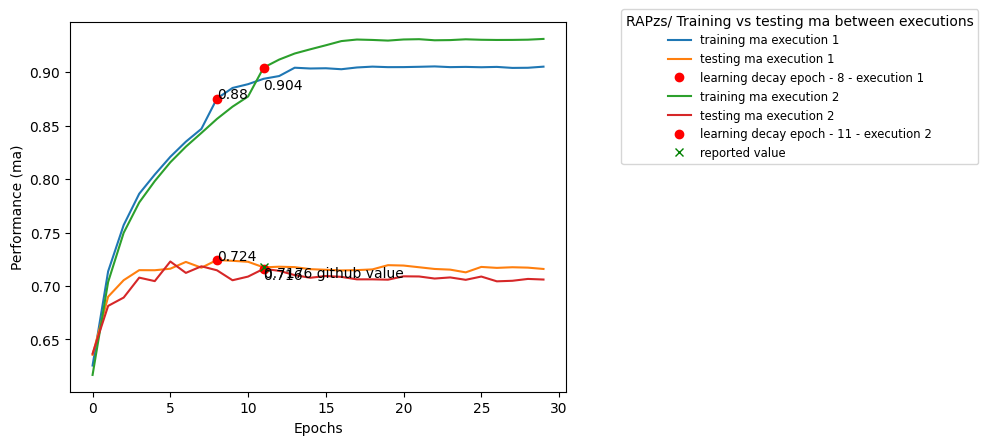

In [3]:
plotTrainingVsTesting(listF1Training1, listF1Testing1, listF1Training2, listF1Testing2, tittle, lrEpochDecay1, lrEpochDecay2, reportedGithubValueF1)

In [4]:
def compareAttributeInTwoExecutions(attribute, pathToTestingLabels1, pathToTrainingLabels1, pathToTestingLabels2, pathToTrainingLabels2, lrEpochDecay1, lrEpochDecay2):
    fileTestingLabels1 = open(pathToTestingLabels1)
    jsonTestingLabels1 = json.load(fileTestingLabels1)
    fileTrainingLabels1 = open(pathToTrainingLabels1)
    jsonTrainingLabels1 = json.load(fileTrainingLabels1)

    fileTestingLabels2 = open(pathToTestingLabels2)
    jsonTestingLabels2 = json.load(fileTestingLabels2)
    fileTrainingLabels2 = open(pathToTrainingLabels2)
    jsonTrainingLabels2 = json.load(fileTrainingLabels2)

    f1KeyAtribute='f1_'+attribute
    listF1Testing1 = jsonTestingLabels1[f1KeyAtribute]
    listF1Training1 = jsonTrainingLabels1[f1KeyAtribute]

    listF1Testing2 = jsonTestingLabels2[f1KeyAtribute]
    listF1Training2 = jsonTrainingLabels2[f1KeyAtribute]

    epochs=len(listF1Testing1)
    plt.plot(range(0,epochs), listF1Testing1, label='testing F1 execution 1 '+f1KeyAtribute)
    plt.plot(range(0,epochs), listF1Training1, label='training F1 execution 1 '+f1KeyAtribute)

    plt.plot(lrEpochDecay1, listF1Testing1[lrEpochDecay1], 'o', color='r', label='learning decay epoch - '+str(lrEpochDecay1)+' - execution 2')
    plt.text(s=str(round(listF1Testing1[lrEpochDecay1],3)), x=lrEpochDecay1, y=listF1Testing1[lrEpochDecay1])
    

    plt.plot(range(0,epochs), listF1Testing2, label='testing F1 execution 2 '+f1KeyAtribute)
    plt.plot(range(0,epochs), listF1Training2, label='training F1 execution 2 '+f1KeyAtribute)

    plt.plot(lrEpochDecay2, listF1Testing2[lrEpochDecay2], 'o', color='r')
    plt.text(s=str(round(listF1Testing2[lrEpochDecay2],3)), x=lrEpochDecay2, y=listF1Testing2[lrEpochDecay2]-0.01)

    plt.xlabel('Epochs')
    plt.ylabel('Performance (F1)')
    plt.legend(bbox_to_anchor=(1.1, 1.05), fontsize='small', fancybox=True)
    plt.show()

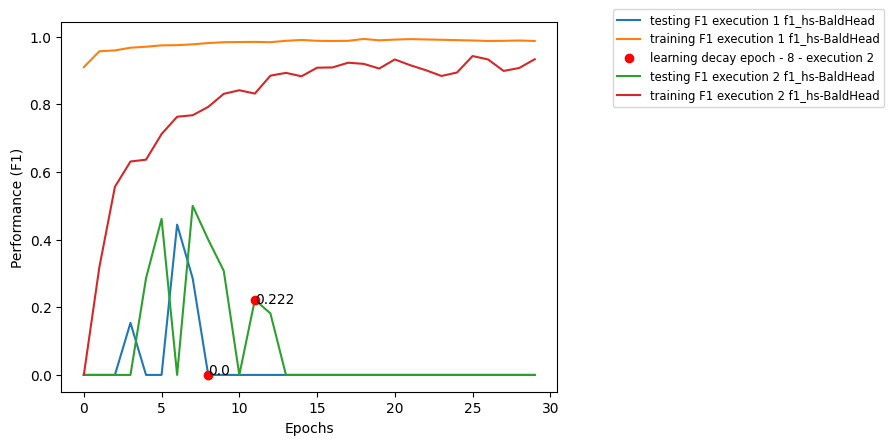

In [5]:

pathToTestingLabels1 = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+pathToJson1+'/testing_metrics_labels.json'
pathToTrainingLabels1 =  '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+pathToJson1+'/training_metrics_labels.json'
pathToTestingLabels2 = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+pathToJson2+'/testing_metrics_labels.json'
pathToTrainingLabels2 =  '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+pathToJson2+'/training_metrics_labels.json'
compareAttributeInTwoExecutions(attribute, pathToTestingLabels1, pathToTrainingLabels1, pathToTestingLabels2, pathToTrainingLabels2, lrEpochDecay1, lrEpochDecay2)

In [6]:
jsonTestingOverall1['f1']

[0.7454008946149572,
 0.7663761697584516,
 0.7751294109551143,
 0.7658352681207051,
 0.7713082611917534,
 0.7731646285555133,
 0.7665512449162387,
 0.7693785100176829,
 0.7810239083383546,
 0.7799235709215093,
 0.7771845309912947,
 0.7764737460866383,
 0.7756317486783882,
 0.7767216720228594,
 0.7758734322321579,
 0.7761381583517392,
 0.7751584458880107,
 0.7749410310528302,
 0.7752181024636792,
 0.7755938863167614,
 0.7747377579821371,
 0.7764513937580452,
 0.7764566791138249,
 0.775854654490491,
 0.7761363818089426,
 0.7756988399357362,
 0.7748640734420188,
 0.7751478798750415,
 0.7758389052206831,
 0.776189000843159]

In [7]:
pathToTestingLabels = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+pathToJson1+'/testing_metrics_labels.json'
pathToTrainingLabels =  '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+pathToJson1+'/training_metrics_labels.json'

fileTestingLabels = open(pathToTestingLabels)
jsonTestingLabels = json.load(fileTestingLabels)

fileTrainingLabels = open(pathToTrainingLabels)
jsonTrainingLabels = json.load(fileTrainingLabels)

def SortByPerformanceBestStep(sub_li, step):
    return(sorted(sub_li, key=lambda x: x[step], reverse =True))

f1Key='f1'
listTestingLabelsKeys = [key for key,value in jsonTestingLabels.items() if key.startswith(f1Key)]
listTestingLabelsPerformance = [value for key,value in jsonTestingLabels.items() if key.startswith(f1Key)]

listTestingLabelsPerformance=SortByPerformanceBestStep(listTestingLabelsPerformance, lrEpochDecay1)

listTrainingLabelsKeys = [key for key,value in jsonTrainingLabels.items() if key.startswith(f1Key)]
listTrainingLabelsPerformance = [value for key,value in jsonTrainingLabels.items() if key.startswith(f1Key)]

listTrainingLabelsPerformance=SortByPerformanceBestStep(listTrainingLabelsPerformance, lrEpochDecay1)

medium = 0.4
good = 0.85
step = lrEpochDecay1

def plotAttributesJson(listAttr, listPerformance, tittle,step):
    epochs=len(listPerformance[0])
    valuesX = range(0,epochs)

    classes = []
    for attribute, performance in zip(listAttr, listPerformance):
        valuesY = performance
        classes.append( attribute + " - {:.2f}".format(performance[step]))
        plt.plot(valuesX, valuesY)

    plt.xlabel('Epochs')
    plt.ylabel('Performance (F1)')
    plt.legend(labels=classes, bbox_to_anchor=(1.1, 1.05), title=tittle, ncol=3, fontsize='small', fancybox=True)
    plt.show()

def plotAttributesJsonInterval(listAttr, listPerformance, tittle, step, floor, ceil):
    epochs=len(listPerformance[0])
    valuesX = range(0,epochs)

    classes = []
    for attribute, performance in zip(listAttr, listPerformance):
        valuesY = performance
        if valuesY[step] >=floor and valuesY[step]<ceil:
            classes.append( attribute + " - {:.2f}".format(performance[step]))
            plt.plot(valuesX, valuesY)

    plt.xlabel('Epochs')
    plt.ylabel('Performance (F1)')
    plt.legend(labels=classes, bbox_to_anchor=(1.1, 1.05), title=tittle, ncol=2, fontsize='small', fancybox=True)
    plt.show()

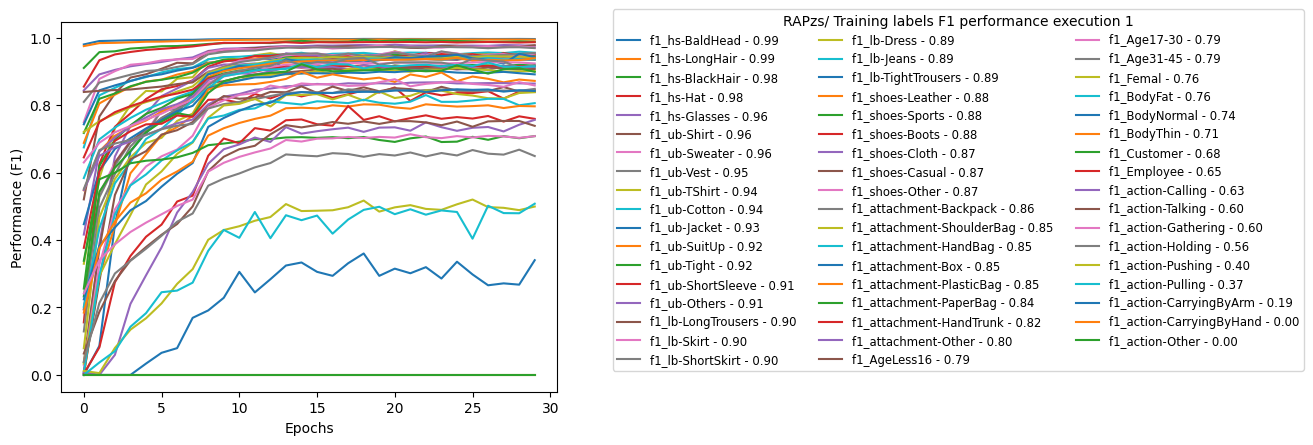

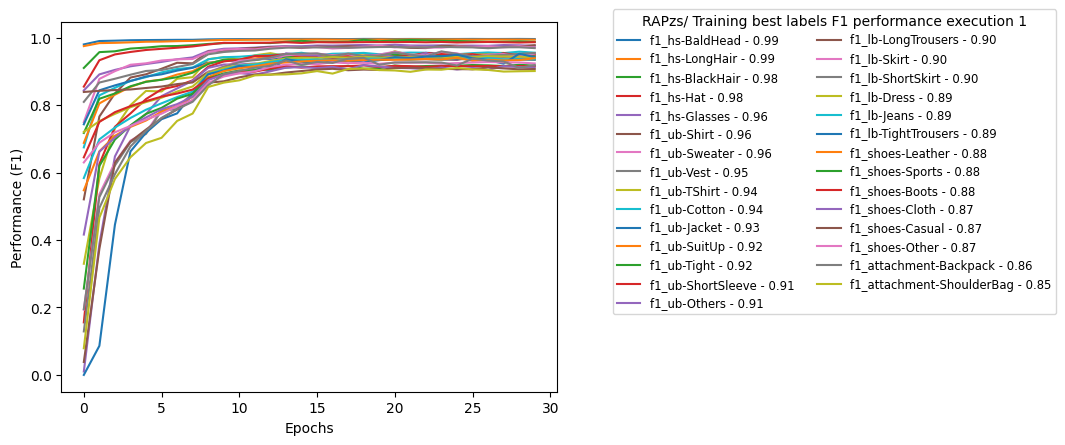

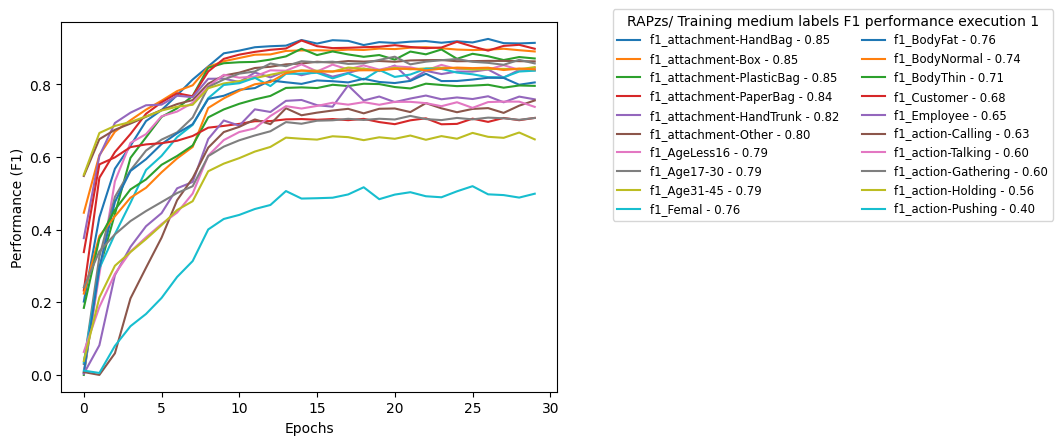

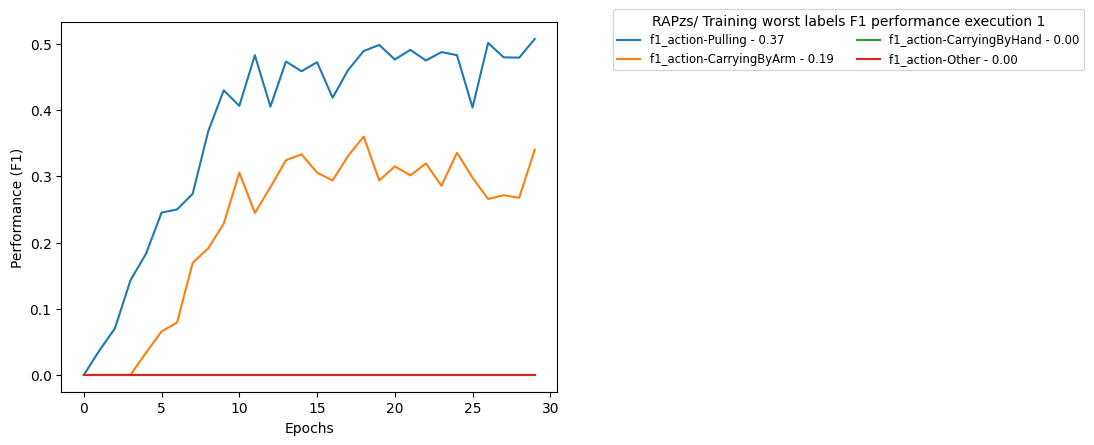

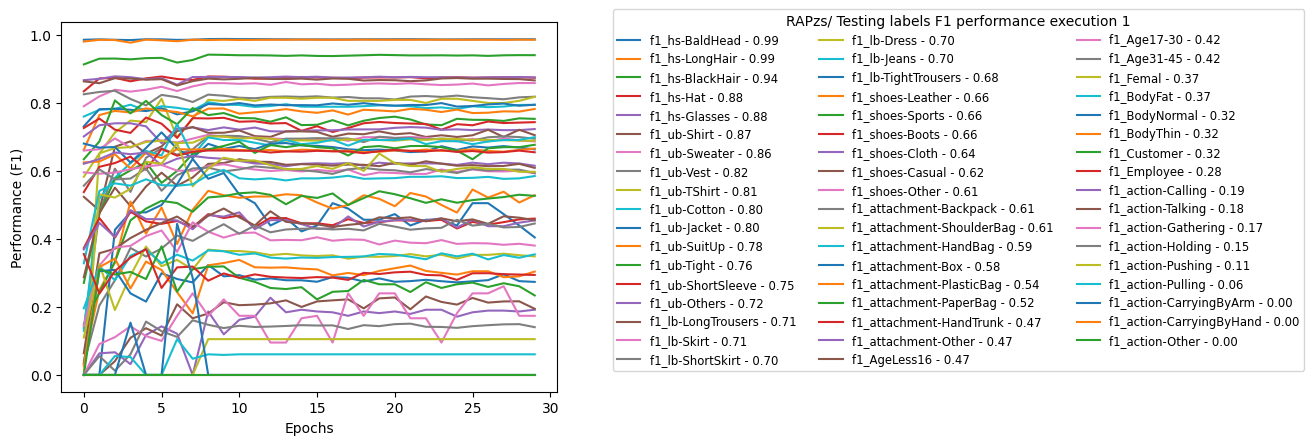

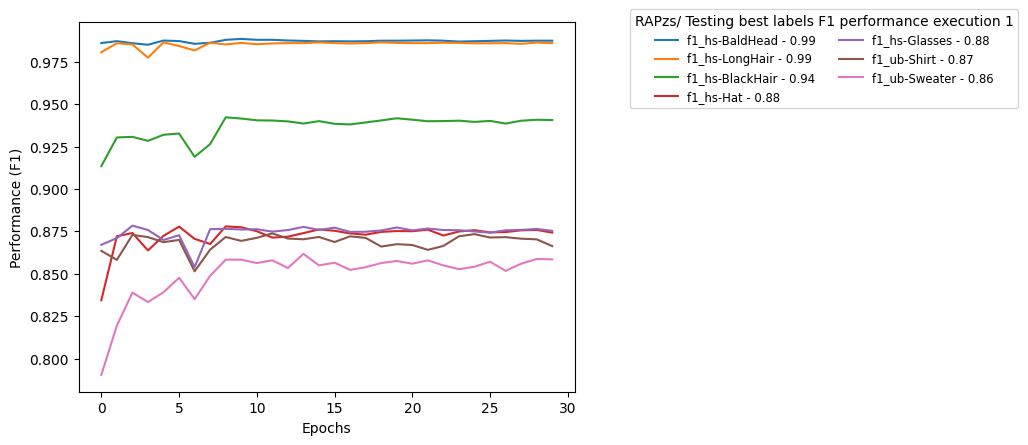

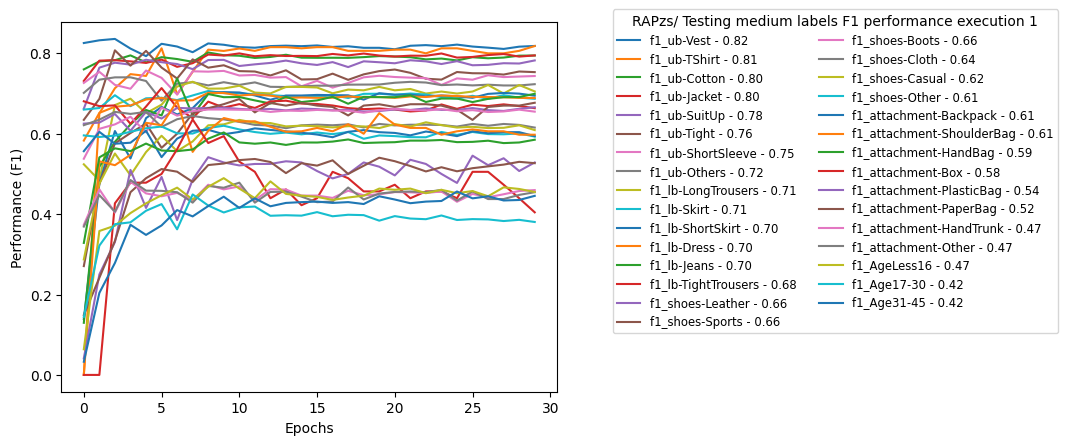

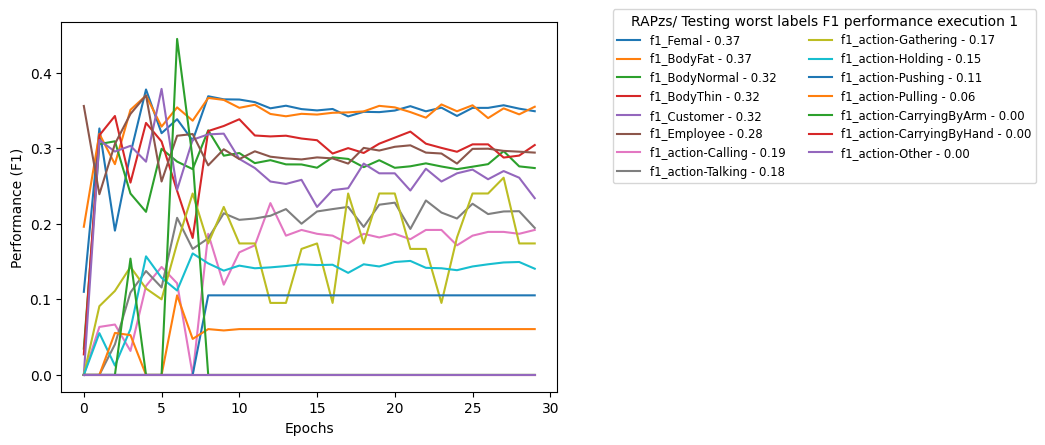

In [8]:
tittle=dataset+" Training labels F1 performance execution 1"
plotAttributesJson(listTrainingLabelsKeys, listTrainingLabelsPerformance, tittle, step)

tittle=dataset+" Training best labels F1 performance execution 1"
plotAttributesJsonInterval(listTrainingLabelsKeys, listTrainingLabelsPerformance, tittle, step, floor=good, ceil=1)
tittle=dataset+" Training medium labels F1 performance execution 1"
plotAttributesJsonInterval(listTrainingLabelsKeys, listTrainingLabelsPerformance, tittle, step, floor=medium, ceil=good)
tittle=dataset+" Training worst labels F1 performance execution 1"
plotAttributesJsonInterval(listTrainingLabelsKeys, listTrainingLabelsPerformance, tittle, step, floor=0, ceil=medium)

tittle=dataset+" Testing labels F1 performance execution 1"
plotAttributesJson(listTestingLabelsKeys, listTestingLabelsPerformance, tittle, step)

tittle=dataset+" Testing best labels F1 performance execution 1"
plotAttributesJsonInterval(listTestingLabelsKeys, listTestingLabelsPerformance, tittle, step, floor=good, ceil=1)
tittle=dataset+" Testing medium labels F1 performance execution 1"
plotAttributesJsonInterval(listTestingLabelsKeys, listTestingLabelsPerformance, tittle, step, floor=medium, ceil=good)
tittle=dataset+" Testing worst labels F1 performance execution 1"
plotAttributesJsonInterval(listTestingLabelsKeys, listTestingLabelsPerformance, tittle, step, floor=0, ceil=medium)

In [8]:
pathToTestingLabels = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+pathToJson2+'/testing_metrics_labels.json'
pathToTrainingLabels =  '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/'+pathToJson2+'/training_metrics_labels.json'

fileTestingLabels = open(pathToTestingLabels)
jsonTestingLabels = json.load(fileTestingLabels)

fileTrainingLabels = open(pathToTrainingLabels)
jsonTrainingLabels = json.load(fileTrainingLabels)

def SortByPerformanceBestStep(sub_li, step):
    return(sorted(sub_li, key=lambda x: x[step], reverse =True))

f1Key='f1'
listTestingLabelsKeys = [key for key,value in jsonTestingLabels.items() if key.startswith(f1Key)]
listTestingLabelsPerformance = [value for key,value in jsonTestingLabels.items() if key.startswith(f1Key)]

listTestingLabelsPerformance=SortByPerformanceBestStep(listTestingLabelsPerformance, lrEpochDecay2)

listTrainingLabelsKeys = [key for key,value in jsonTrainingLabels.items() if key.startswith(f1Key)]
listTrainingLabelsPerformance = [value for key,value in jsonTrainingLabels.items() if key.startswith(f1Key)]

listTrainingLabelsPerformance=SortByPerformanceBestStep(listTrainingLabelsPerformance, lrEpochDecay2)

medium = 0.4
good = 0.85
step = lrEpochDecay2

def plotAttributesJson(listAttr, listPerformance, tittle,step):
    epochs=len(listPerformance[0])
    valuesX = range(0,epochs)

    classes = []
    for attribute, performance in zip(listAttr, listPerformance):
        valuesY = performance
        classes.append( attribute + " - {:.2f}".format(performance[step]))
        plt.plot(valuesX, valuesY)

    plt.xlabel('Epochs')
    plt.ylabel('Performance (F1)')
    plt.legend(labels=classes, bbox_to_anchor=(1.1, 1.05), title=tittle, ncol=3, fontsize='small', fancybox=True)
    plt.show()

def plotAttributesJsonInterval(listAttr, listPerformance, tittle, step, floor, ceil):
    epochs=len(listPerformance[0])
    valuesX = range(0,epochs)

    classes = []
    for attribute, performance in zip(listAttr, listPerformance):
        valuesY = performance
        if valuesY[step] >=floor and valuesY[step]<ceil:
            classes.append( attribute + " - {:.2f}".format(performance[step]))
            plt.plot(valuesX, valuesY)

    plt.xlabel('Epochs')
    plt.ylabel('Performance (F1)')
    plt.legend(labels=classes, bbox_to_anchor=(1.1, 1.05), title=tittle, ncol=2, fontsize='small', fancybox=True)
    plt.show()

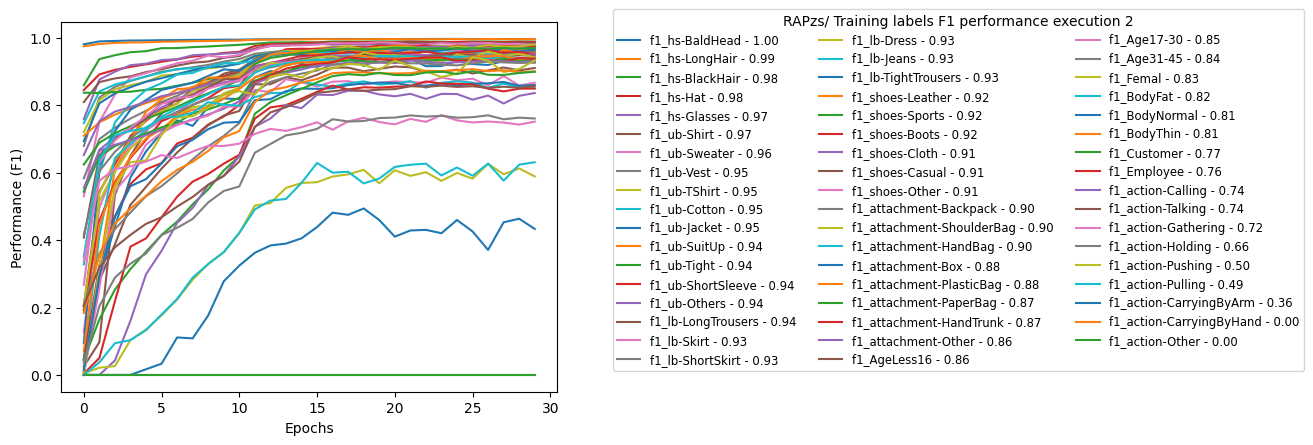

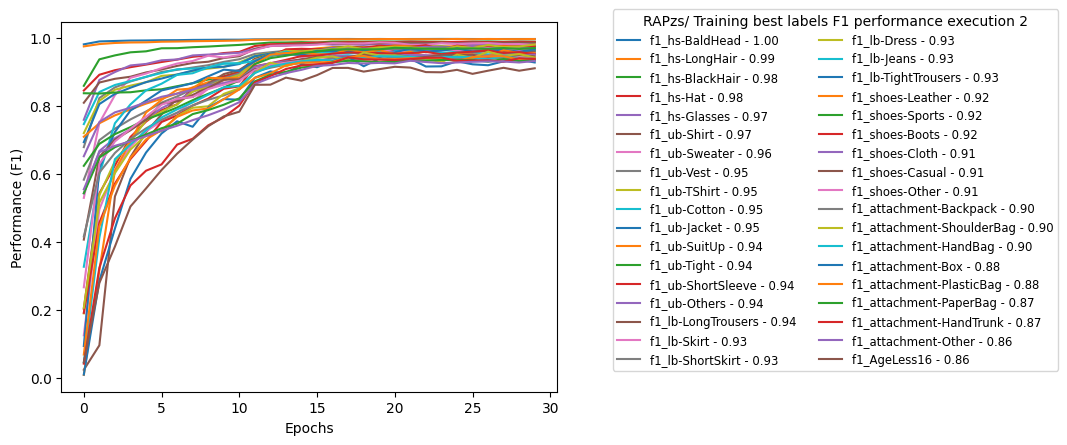

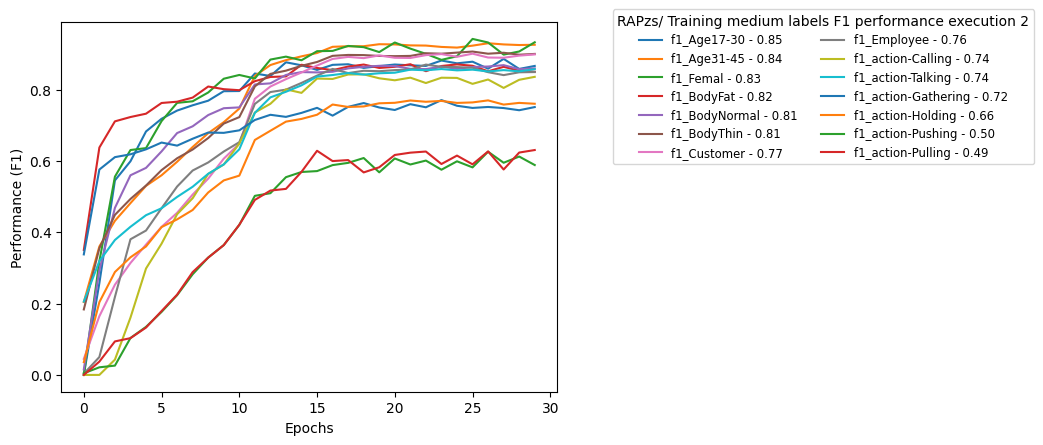

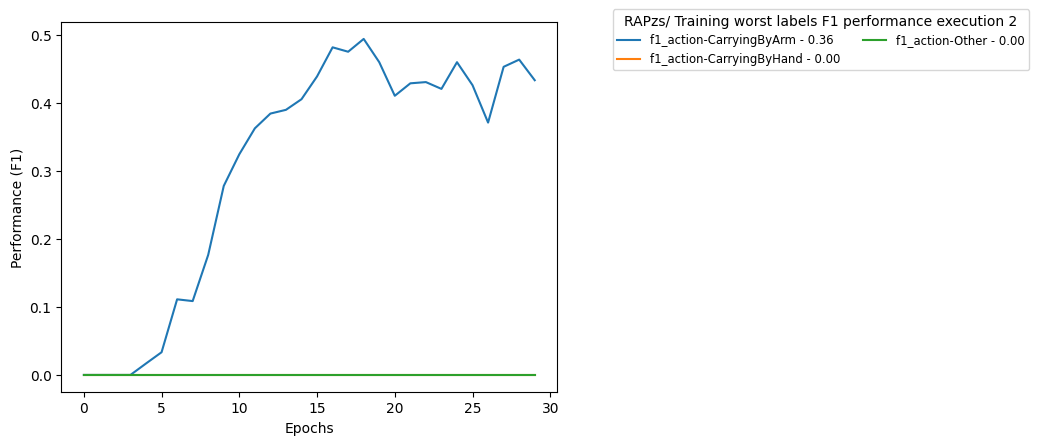

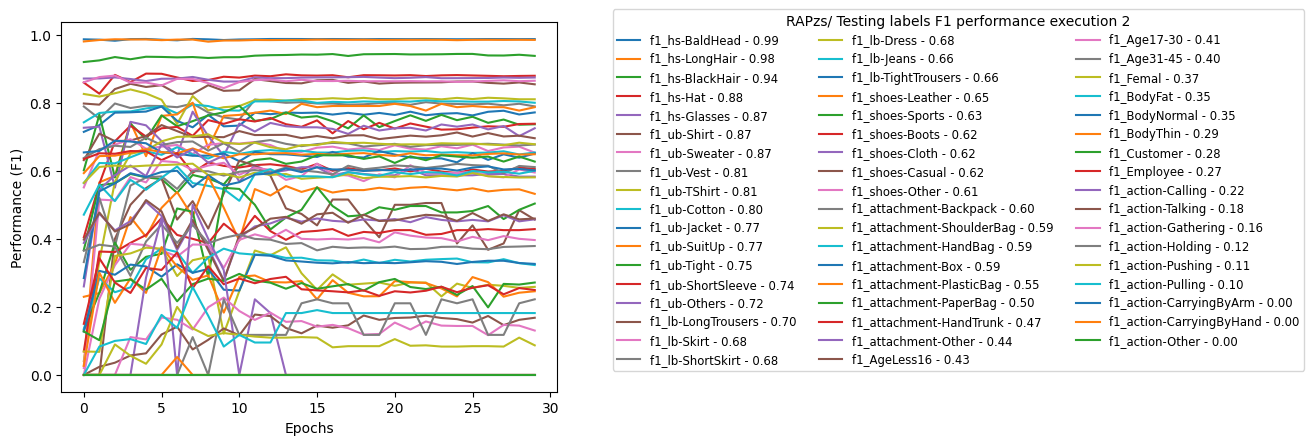

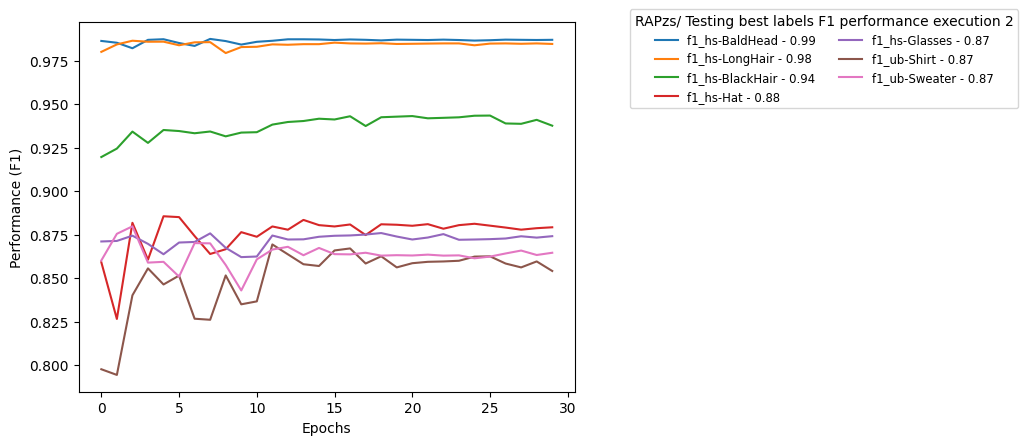

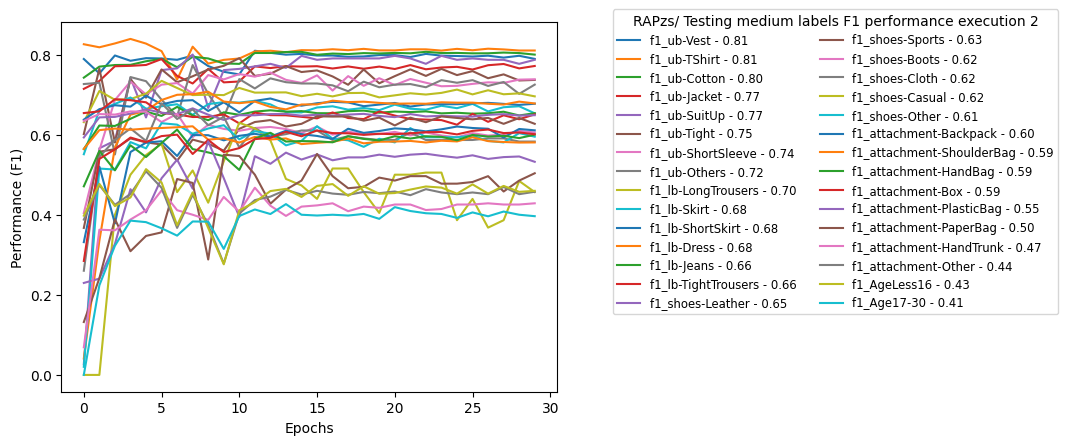

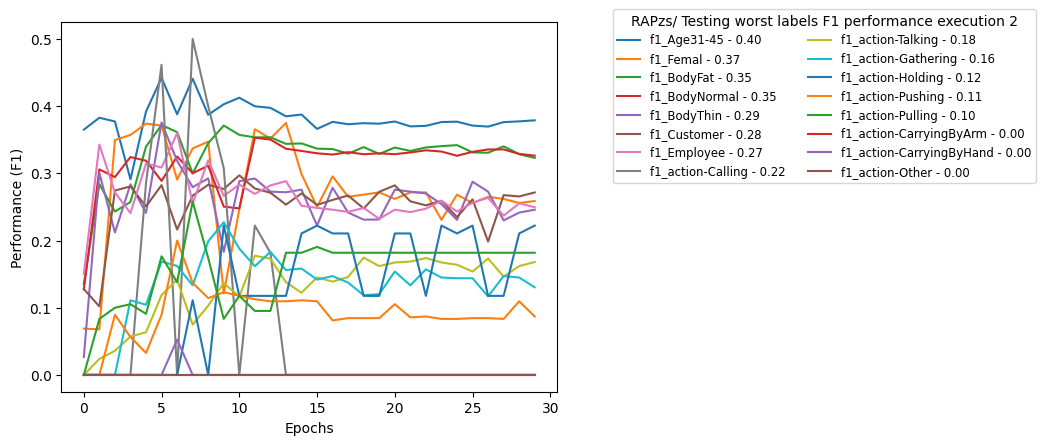

In [9]:
tittle=dataset+" Training labels F1 performance execution 2"
plotAttributesJson(listTrainingLabelsKeys, listTrainingLabelsPerformance, tittle, step)

tittle=dataset+" Training best labels F1 performance execution 2"
plotAttributesJsonInterval(listTrainingLabelsKeys, listTrainingLabelsPerformance, tittle, step, floor=good, ceil=1)
tittle=dataset+" Training medium labels F1 performance execution 2"
plotAttributesJsonInterval(listTrainingLabelsKeys, listTrainingLabelsPerformance, tittle, step, floor=medium, ceil=good)
tittle=dataset+" Training worst labels F1 performance execution 2"
plotAttributesJsonInterval(listTrainingLabelsKeys, listTrainingLabelsPerformance, tittle, step, floor=0, ceil=medium)

tittle=dataset+" Testing labels F1 performance execution 2"
plotAttributesJson(listTestingLabelsKeys, listTestingLabelsPerformance, tittle, step)

tittle=dataset+" Testing best labels F1 performance execution 2"
plotAttributesJsonInterval(listTestingLabelsKeys, listTestingLabelsPerformance, tittle, step, floor=good, ceil=1)
tittle=dataset+" Testing medium labels F1 performance execution 2"
plotAttributesJsonInterval(listTestingLabelsKeys, listTestingLabelsPerformance, tittle, step, floor=medium, ceil=good)
tittle=dataset+" Testing worst labels F1 performance execution 2"
plotAttributesJsonInterval(listTestingLabelsKeys, listTestingLabelsPerformance, tittle, step, floor=0, ceil=medium)

In [10]:
pathToF1Test = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/RAPzs/RAPzs_testing_f1.csv'

pathToF1Ttraining = '/mnt/rhome/paa/pedestrian/attribute_analysis_pedestrian/attribute_analysis_pedestrian/RAPzs/RAPzs_training_f1.csv'

In [11]:
training_dt_f1 = pd.read_csv(pathToF1Ttraining, sep=',', index_col=False)
test_dt_f1 = pd.read_csv(pathToF1Test, sep=',', index_col=False)

In [12]:
#training_dt_f1 = training_dt_f1.sort_values(by='value', ascending=True)
#test_dt_f1 = test_dt_f1.sort_values(by='value', ascending=True)

In [13]:
intervalTraining = training_dt_f1[training_dt_f1['step'] == step].sort_values(by='value', ascending=True)
listAttributesTraining = list(intervalTraining['key'])

intervalTesting = test_dt_f1[test_dt_f1['step'] == step].sort_values(by='value', ascending=True)
listAttributesTesting = list(intervalTesting['key'])

In [14]:
intervalBadTraining = training_dt_f1[(training_dt_f1['value'] <= medium) & (training_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listBadAttributesTraining = list(intervalBadTraining['key'])
listBadAttributesTraining.remove('learning_rate_605')
listBadAttributesTrainingPerformance = list(intervalBadTraining['value'])

intervalMediumTraining = training_dt_f1[(training_dt_f1['value'] > medium) & (training_dt_f1['value'] <= good) & (training_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listMediumAttributesTraining = list(intervalMediumTraining['key'])
listMediumAttributesTrainingPerformance = list(intervalMediumTraining['value'])


intervalGoodTraining = training_dt_f1[(training_dt_f1['value'] > good) & (training_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listGoodAttributesTraining = list(intervalGoodTraining['key'])
listGoodAttributesTrainingPerformance = list(intervalGoodTraining['value'])

In [15]:
def plotAttributes(listAttr, ds, listPerformance, tittle):
    for attribute in listAttr:
        valuesX = list(ds[ds['key'] == attribute]['value'])
        valuesY = list(ds[ds['key'] == attribute]['step'])
        plt.plot(valuesY, valuesX)
    
    classes = []
    for attrib, performance in zip(listAttr, listPerformance):
        classes.append( attrib + " - {:.2f}".format(performance))

    plt.xlabel('Epochs')
    plt.ylabel('Performance (F1)')
    plt.legend(labels=classes, bbox_to_anchor=(1.1, 1.05), title=tittle, fontsize='small', fancybox=True)
    plt.show()

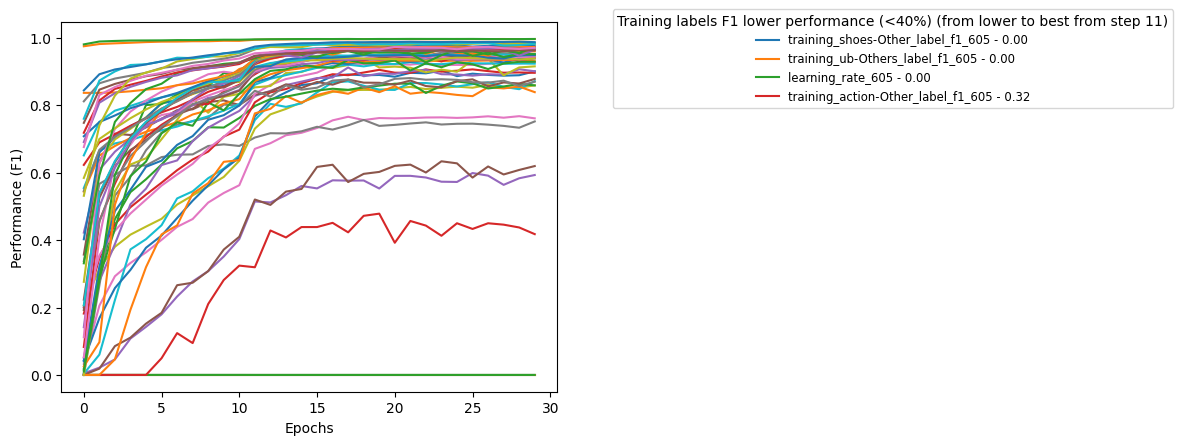

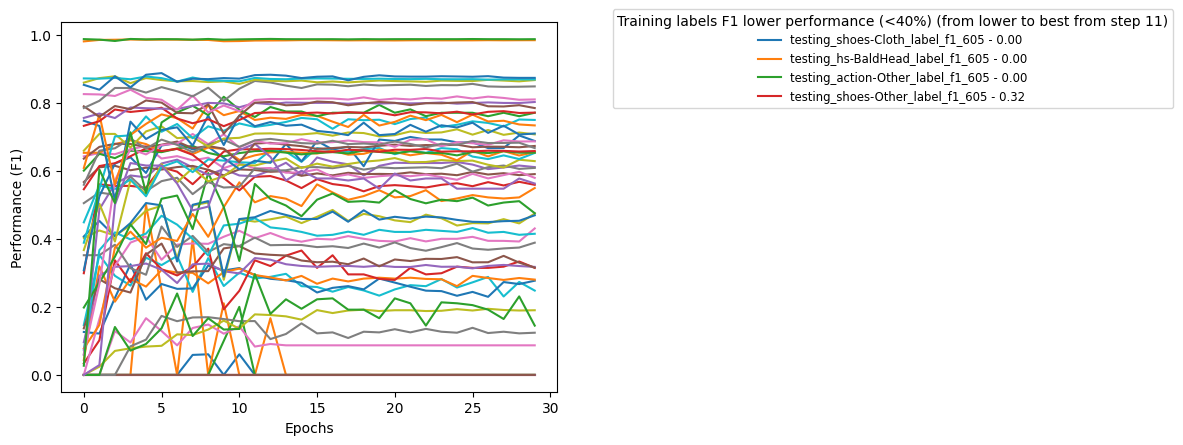

In [17]:
plotAttributes(listAttributesTraining, training_dt_f1, listBadAttributesTrainingPerformance, "Training labels F1 lower performance (<40%) (from lower to best from step {})".format(step))
plotAttributes(listAttributesTesting, test_dt_f1, listBadAttributesTrainingPerformance, "Training labels F1 lower performance (<40%) (from lower to best from step {})".format(step))


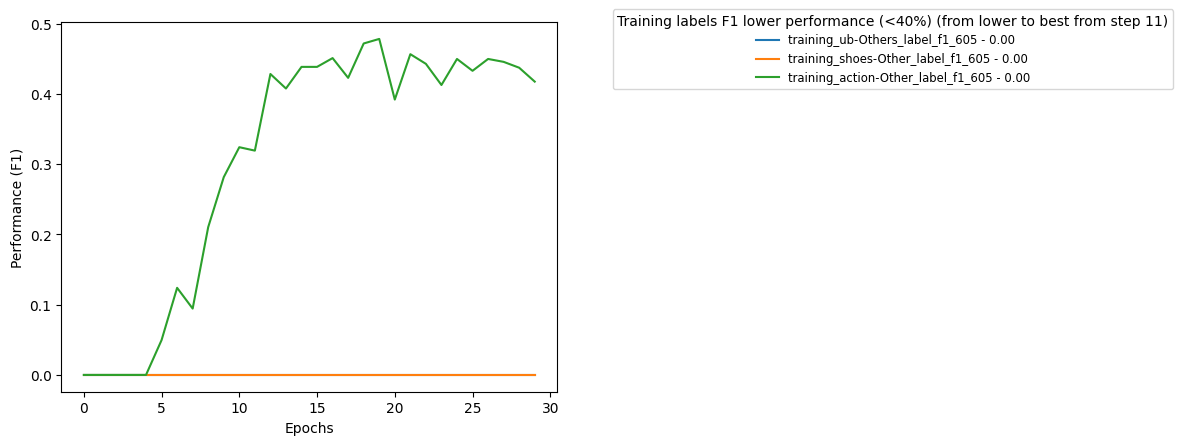

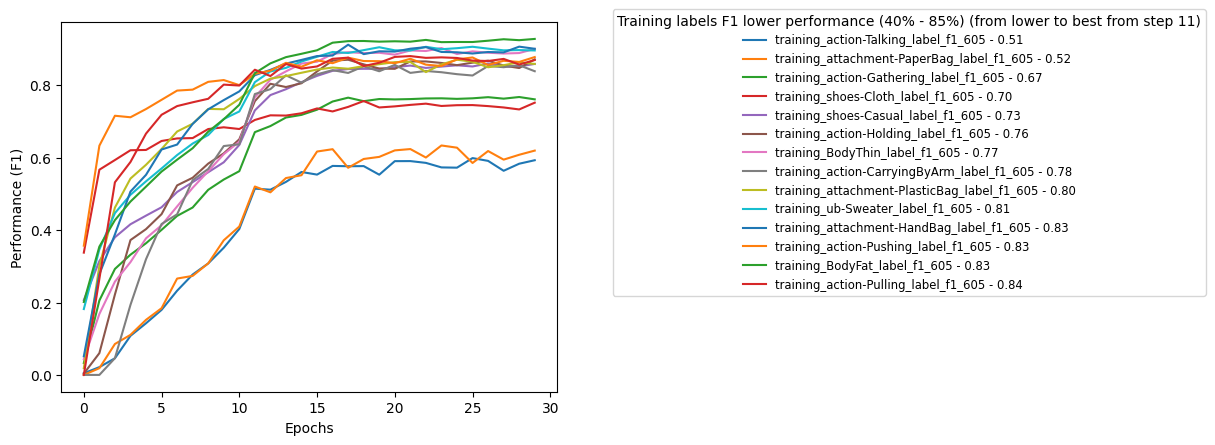

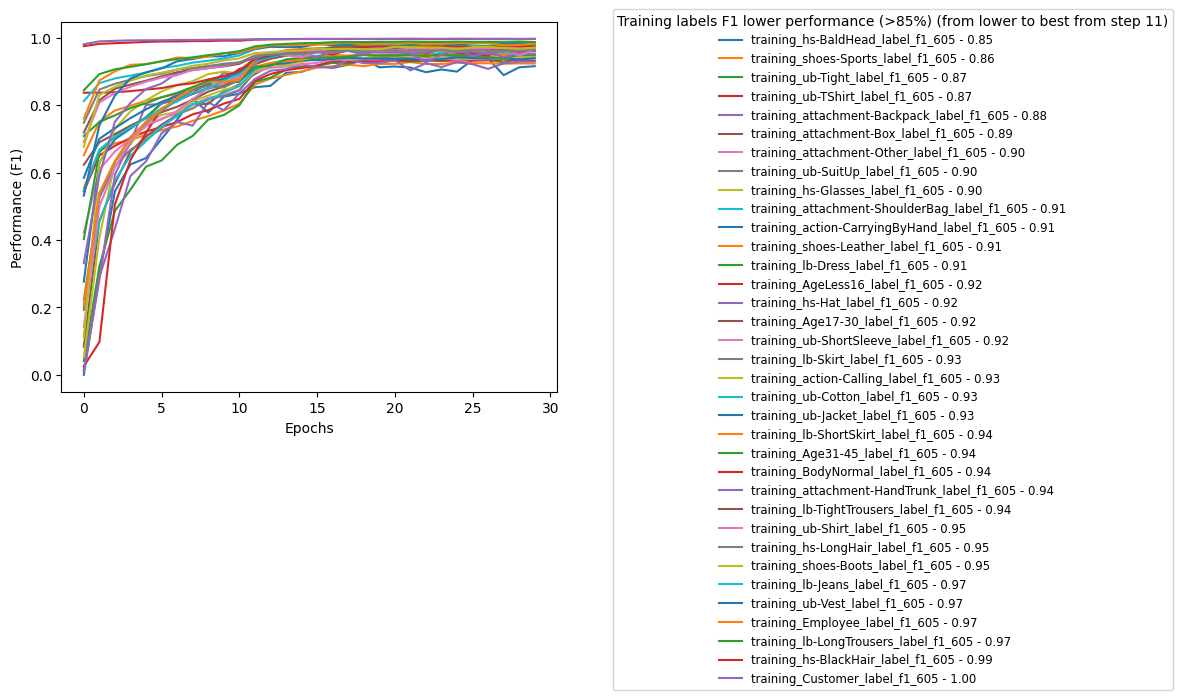

In [18]:
plotAttributes(listBadAttributesTraining, training_dt_f1, listBadAttributesTrainingPerformance, "Training labels F1 lower performance (<40%) (from lower to best from step {})".format(step))
plotAttributes(listMediumAttributesTraining, training_dt_f1, listMediumAttributesTrainingPerformance, "Training labels F1 lower performance (40% - 85%) (from lower to best from step {})".format(step))
plotAttributes(listGoodAttributesTraining, training_dt_f1, listGoodAttributesTrainingPerformance, "Training labels F1 lower performance (>85%) (from lower to best from step {})".format(step))

In [16]:
intervalBadTesting = test_dt_f1[(test_dt_f1['value'] <= medium) & (test_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listBadAttributesTesting = list(intervalBadTesting['key'])
listBadAttributesTesting.remove('learning_rate_605')
listBadAttributesTestingPerformance = list(intervalBadTesting['value'])

intervalMediumTesting = test_dt_f1[(test_dt_f1['value'] > medium) & (test_dt_f1['value'] <= good) & (test_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listMediumAttributesTesting = list(intervalMediumTesting['key'])
listMediumAttributesTestingPerformance = list(intervalMediumTesting['value'])

intervalGoodTesting = test_dt_f1[(test_dt_f1['value'] > good) & (test_dt_f1['step'] == step)].sort_values(by='value', ascending=True)
listGoodAttributesTesting = list(intervalGoodTesting['key'])
listGoodAttributesTestingPerformance = list(intervalGoodTesting['value'])

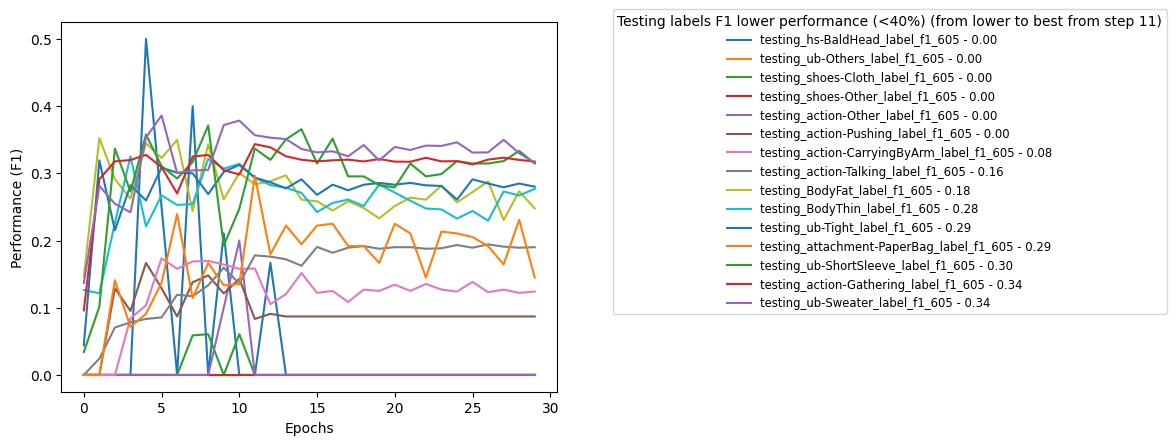

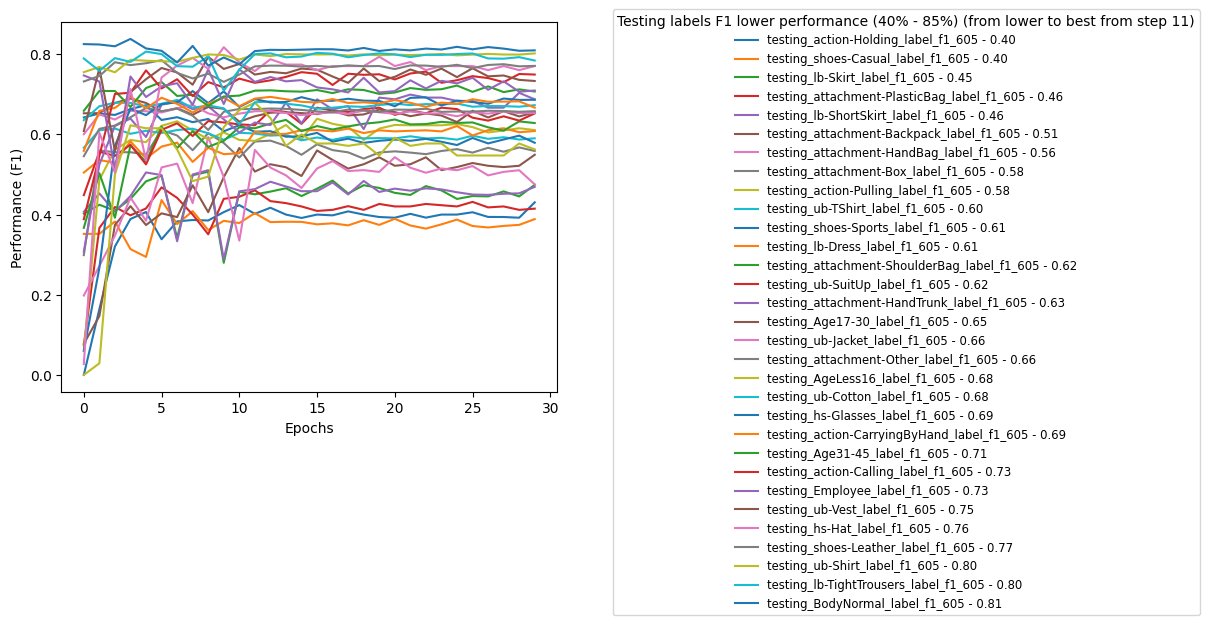

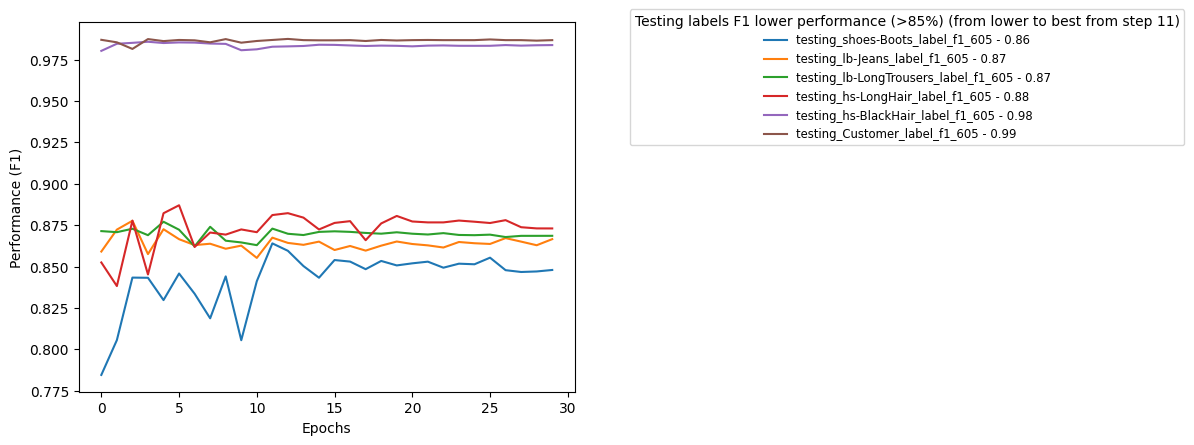

In [20]:
plotAttributes(listBadAttributesTesting, test_dt_f1, listBadAttributesTestingPerformance, "Testing labels F1 lower performance (<40%) (from lower to best from step {})".format(step))
plotAttributes(listMediumAttributesTesting, test_dt_f1, listMediumAttributesTestingPerformance, "Testing labels F1 lower performance (40% - 85%) (from lower to best from step {})".format(step))
plotAttributes(listGoodAttributesTesting, test_dt_f1, listGoodAttributesTestingPerformance, "Testing labels F1 lower performance (>85%) (from lower to best from step {})".format(step))

In [17]:
listAttributesRAPv2 = ['hs-BaldHead', 'hs-LongHair', 'hs-BlackHair', 'hs-Hat', 'hs-Glasses','ub-Shirt','ub-Sweater','ub-Vest','ub-TShirt','ub-Cotton','ub-Jacket','ub-SuitUp','ub-Tight','ub-ShortSleeve','ub-Others','lb-LongTrousers','lb-Skirt','lb-ShortSkirt','lb-Dress','lb-Jeans','lb-TightTrousers','shoes-Leather', 'shoes-Sports', 'shoes-Boots', 'shoes-Cloth', 'shoes-Casual', 'shoes-Other','attachment-Backpack','attachment-ShoulderBag','attachment-HandBag','attachment-Box','attachment-PlasticBag','attachment-PaperBag','attachment-HandTrunk','attachment-Other','AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60','Female','BodyFat','BodyNormal','BodyThin','Customer','Employee','action-Calling','action-Talking','action-Gathering','action-Holding','action-Pushing','action-Pulling','action-CarryingByArm','action-CarryingByHand','action-Other']
listAttributesRAPzs = listAttributesRAPv2

In [18]:
tablaBadTesting = pd.DataFrame()
listBadAttributesTestingPerformance.remove(listBadAttributesTestingPerformance[0])
tablaBadTesting['attributes'] = listBadAttributesTesting
tablaBadTesting['performance'] = listBadAttributesTestingPerformance
tablaMediumTesting = pd.DataFrame()
tablaMediumTesting['attributes'] = listMediumAttributesTesting
tablaMediumTesting['performance'] = listMediumAttributesTestingPerformance
tablaGoodTesting = pd.DataFrame()
tablaGoodTesting['attributes'] = listGoodAttributesTesting
tablaGoodTesting['performance'] = listGoodAttributesTestingPerformance

tablaBadTraining = pd.DataFrame()
listBadAttributesTrainingPerformance.remove(listBadAttributesTrainingPerformance[0])
tablaBadTraining['attributes'] = listBadAttributesTraining
tablaBadTraining['performance'] = listBadAttributesTrainingPerformance

tablaMediumTraining = pd.DataFrame()
tablaMediumTraining['attributes'] = listMediumAttributesTraining
tablaMediumTraining['performance'] = listMediumAttributesTrainingPerformance

tablaGoodTraining = pd.DataFrame()
tablaGoodTraining['attributes'] = listGoodAttributesTraining
tablaGoodTraining['performance'] = listGoodAttributesTrainingPerformance

listPerfoTraining=[]
listPerfoTesting=[]
for attributeReal in listAttributesRAPzs:
    
    for attributeTraining in listBadAttributesTraining:
        if attributeReal in attributeTraining:
            #get performance
            perfoTraining = listBadAttributesTrainingPerformance[listBadAttributesTraining.index(attributeTraining)]
    
    for attributeTraining in listMediumAttributesTraining:
        if attributeReal in attributeTraining:
            #get performance
            perfoTraining = listMediumAttributesTrainingPerformance[listMediumAttributesTraining.index(attributeTraining)]
    
    for attributeTraining in listGoodAttributesTraining:
        if attributeReal in attributeTraining:
            #get performance
            perfoTraining = listGoodAttributesTrainingPerformance[listGoodAttributesTraining.index(attributeTraining)]

    for attributeTesting in listBadAttributesTesting:
        if attributeReal in attributeTesting:
            #get performance
            perfoTesting = listBadAttributesTestingPerformance[listBadAttributesTesting.index(attributeTesting)]
    
    for attributeTesting in listMediumAttributesTesting:
        if attributeReal in attributeTesting:
            #get performance
            perfoTesting = listMediumAttributesTestingPerformance[listMediumAttributesTesting.index(attributeTesting)]
    
    for attributeTesting in listGoodAttributesTesting:
        if attributeReal in attributeTesting:
            #get performance
            perfoTesting = listGoodAttributesTestingPerformance[listGoodAttributesTesting.index(attributeTesting)]
    
    listPerfoTraining.append(perfoTraining)
    listPerfoTesting.append(perfoTesting)



tablaAll = pd.DataFrame({'attribute': listAttributesRAPzs,
     'perfo training (F1)': listPerfoTraining,
     'perfo testing (F1)': listPerfoTesting
    })

In [19]:
tablaBadTraining

attributes  performance
0     training_ub-Others_label_f1_605     0.000000
1   training_shoes-Other_label_f1_605     0.000010
2  training_action-Other_label_f1_605     0.319444

In [20]:
tablaBadTesting

attributes  performance
0            testing_hs-BaldHead_label_f1_605     0.000000
1              testing_ub-Others_label_f1_605     0.000000
2            testing_shoes-Cloth_label_f1_605     0.000000
3            testing_shoes-Other_label_f1_605     0.000000
4           testing_action-Other_label_f1_605     0.000010
5         testing_action-Pushing_label_f1_605     0.083333
6   testing_action-CarryingByArm_label_f1_605     0.158273
7         testing_action-Talking_label_f1_605     0.177966
8                testing_BodyFat_label_f1_605     0.283630
9               testing_BodyThin_label_f1_605     0.293465
10              testing_ub-Tight_label_f1_605     0.293578
11   testing_attachment-PaperBag_label_f1_605     0.296296
12        testing_ub-ShortSleeve_label_f1_605     0.336842
13      testing_action-Gathering_label_f1_605     0.343461
14            testing_ub-Sweater_label_f1_605     0.356757

In [21]:
tablaMediumTraining

attributes  performance
0          training_action-Talking_label_f1_605     0.514571
1     training_attachment-PaperBag_label_f1_605     0.520468
2        training_action-Gathering_label_f1_605     0.670702
3             training_shoes-Cloth_label_f1_605     0.704358
4            training_shoes-Casual_label_f1_605     0.730764
5          training_action-Holding_label_f1_605     0.756335
6                training_BodyThin_label_f1_605     0.767143
7    training_action-CarryingByArm_label_f1_605     0.775956
8   training_attachment-PlasticBag_label_f1_605     0.797988
9              training_ub-Sweater_label_f1_605     0.808785
10     training_attachment-HandBag_label_f1_605     0.828039
11         training_action-Pushing_label_f1_605     0.831655
12                training_BodyFat_label_f1_605     0.833797
13         training_action-Pulling_label_f1_605     0.843137

In [22]:
tablaMediumTesting

attributes  performance
0           testing_action-Holding_label_f1_605     0.401914
1             testing_shoes-Casual_label_f1_605     0.403587
2                 testing_lb-Skirt_label_f1_605     0.450593
3    testing_attachment-PlasticBag_label_f1_605     0.460526
4            testing_lb-ShortSkirt_label_f1_605     0.463415
5      testing_attachment-Backpack_label_f1_605     0.507246
6       testing_attachment-HandBag_label_f1_605     0.561265
7           testing_attachment-Box_label_f1_605     0.582210
8           testing_action-Pulling_label_f1_605     0.583851
9                testing_ub-TShirt_label_f1_605     0.602230
10            testing_shoes-Sports_label_f1_605     0.606607
11                testing_lb-Dress_label_f1_605     0.607029
12  testing_attachment-ShoulderBag_label_f1_605     0.615385
13               testing_ub-SuitUp_label_f1_605     0.622951
14    testing_attachment-HandTrunk_label_f1_605     0.629630
15                testing_Age17-30_label_f1_605     0.645307
16               testing_ub-Jacket_label_f1_605     0.657768
17        testing_attachment-Other_label_f1_605     0.662972
18               testing_AgeLess16_label_f1_605     0.679245
19               testing_ub-Cotton_label_f1_605     0.680083
20              testing_hs-Glasses_label_f1_605     0.688228
21   testing_action-CarryingByHand_label_f1_605     0.689346
22                testing_Age31-45_label_f1_605     0.709163
23          testing_action-Calling_label_f1_605     0.728723
24                testing_Employee_label_f1_605     0.730964
25                 testing_ub-Vest_label_f1_605     0.749257
26                  testing_hs-Hat_label_f1_605     0.758065
27           testing_shoes-Leather_label_f1_605     0.769716
28                testing_ub-Shirt_label_f1_605     0.799286
29        testing_lb-TightTrousers_label_f1_605     0.800266
30              testing_BodyNormal_label_f1_605     0.807947

In [23]:
tablaGoodTraining

attributes  performance
0              training_hs-BaldHead_label_f1_605     0.853211
1             training_shoes-Sports_label_f1_605     0.861091
2                 training_ub-Tight_label_f1_605     0.868864
3                training_ub-TShirt_label_f1_605     0.871859
4      training_attachment-Backpack_label_f1_605     0.877419
5           training_attachment-Box_label_f1_605     0.892060
6         training_attachment-Other_label_f1_605     0.897094
7                training_ub-SuitUp_label_f1_605     0.899242
8               training_hs-Glasses_label_f1_605     0.900175
9   training_attachment-ShoulderBag_label_f1_605     0.905692
10   training_action-CarryingByHand_label_f1_605     0.911697
11           training_shoes-Leather_label_f1_605     0.913938
12                training_lb-Dress_label_f1_605     0.913962
13               training_AgeLess16_label_f1_605     0.921466
14                  training_hs-Hat_label_f1_605     0.923077
15                training_Age17-30_label_f1_605     0.923703
16          training_ub-ShortSleeve_label_f1_605     0.924154
17                training_lb-Skirt_label_f1_605     0.926721
18          training_action-Calling_label_f1_605     0.929693
19               training_ub-Cotton_label_f1_605     0.931097
20               training_ub-Jacket_label_f1_605     0.934206
21           training_lb-ShortSkirt_label_f1_605     0.935655
22                training_Age31-45_label_f1_605     0.937765
23              training_BodyNormal_label_f1_605     0.938298
24    training_attachment-HandTrunk_label_f1_605     0.939417
25        training_lb-TightTrousers_label_f1_605     0.944291
26                training_ub-Shirt_label_f1_605     0.946018
27             training_hs-LongHair_label_f1_605     0.947028
28             training_shoes-Boots_label_f1_605     0.954345
29                training_lb-Jeans_label_f1_605     0.965988
30                 training_ub-Vest_label_f1_605     0.966730
31                training_Employee_label_f1_605     0.968671
32         training_lb-LongTrousers_label_f1_605     0.974200
33            training_hs-BlackHair_label_f1_605     0.994371
34                training_Customer_label_f1_605     0.995630

In [24]:
tablaGoodTesting

attributes  performance
0      testing_shoes-Boots_label_f1_605     0.863978
1         testing_lb-Jeans_label_f1_605     0.867430
2  testing_lb-LongTrousers_label_f1_605     0.872900
3      testing_hs-LongHair_label_f1_605     0.881090
4     testing_hs-BlackHair_label_f1_605     0.982764
5         testing_Customer_label_f1_605     0.986850

In [25]:
tablaAll.to_csv("tablaAll.csv")

In [2]:
import pandas as pd

In [3]:
tablaAll = pd.read_csv("tablaAll.csv")

In [ ]:
import pandas as pd
tablaAll = pd.read_csv("tablaAll.csv")
import pickle
import easydict

fileRAPzs = '/mnt/rhome/paa/pedestrian/Rethinking_of_PAR/data/RAP2/dataset_zs_run0.pkl'

f = open(fileRAPzs, 'rb+')

dataset = pickle.load(f)

listAttributesRAPv2 = ['hs-BaldHead', 'hs-LongHair', 'hs-BlackHair', 'hs-Hat', 'hs-Glasses','ub-Shirt','ub-Sweater','ub-Vest','ub-TShirt','ub-Cotton','ub-Jacket','ub-SuitUp','ub-Tight','ub-ShortSleeve','ub-Others','lb-LongTrousers','lb-Skirt','lb-ShortSkirt','lb-Dress','lb-Jeans','lb-TightTrousers','shoes-Leather', 'shoes-Sports', 'shoes-Boots', 'shoes-Cloth', 'shoes-Casual', 'shoes-Other','attachment-Backpack','attachment-ShoulderBag','attachment-HandBag','attachment-Box','attachment-PlasticBag','attachment-PaperBag','attachment-HandTrunk','attachment-Other','AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60','Female','BodyFat','BodyNormal','BodyThin','Customer','Employee','action-Calling','action-Talking','action-Gathering','action-Holding','action-Pushing','action-Pulling','action-CarryingByArm','action-CarryingByHand','action-Other']
listAttributesRAPzs = listAttributesRAPv2

maxAttributes = len(listAttributesRAPzs)
listTrainingCount = dataset.label[dataset.partition.train][:,:maxAttributes].sum(axis=0).tolist()
listTestingCount = dataset.label[dataset.partition.test][:,:maxAttributes].sum(axis=0).tolist()

In [5]:
tablaAll['training count'] = listTrainingCount
tablaAll['testing count'] = listTestingCount

In [6]:
tablaAll.sort_values(by='perfo testing (F1)')

Unnamed: 0               attribute  perfo training (F1)  \
0            0             hs-BaldHead             0.853211   
24          24             shoes-Cloth             0.704358   
14          14               ub-Others             0.000000   
26          26             shoes-Other             0.000010   
53          53            action-Other             0.319444   
49          49          action-Pushing             0.831655   
51          51    action-CarryingByArm             0.775956   
46          46          action-Talking             0.514571   
40          40                 BodyFat             0.833797   
42          42                BodyThin             0.767143   
12          12                ub-Tight             0.868864   
32          32     attachment-PaperBag             0.520468   
13          13          ub-ShortSleeve             0.924154   
47          47        action-Gathering             0.670702   
6            6              ub-Sweater             0.808785   
48          48          action-Holding             0.756335   
25          25            shoes-Casual             0.730764   
16          16                lb-Skirt             0.926721   
31          31   attachment-PlasticBag             0.797988   
17          17           lb-ShortSkirt             0.935655   
27          27     attachment-Backpack             0.877419   
29          29      attachment-HandBag             0.828039   
30          30          attachment-Box             0.892060   
50          50          action-Pulling             0.843137   
8            8               ub-TShirt             0.871859   
22          22            shoes-Sports             0.861091   
18          18                lb-Dress             0.913962   
28          28  attachment-ShoulderBag             0.905692   
11          11               ub-SuitUp             0.899242   
33          33    attachment-HandTrunk             0.939417   
36          36                Age17-30             0.923703   
10          10               ub-Jacket             0.934206   
34          34        attachment-Other             0.897094   
35          35               AgeLess16             0.921466   
9            9               ub-Cotton             0.931097   
4            4              hs-Glasses             0.900175   
52          52   action-CarryingByHand             0.911697   
37          37                Age31-45             0.937765   
38          38                Age46-60             0.937765   
39          39                  Female             0.937765   
45          45          action-Calling             0.929693   
44          44                Employee             0.968671   
7            7                 ub-Vest             0.966730   
3            3                  hs-Hat             0.923077   
21          21           shoes-Leather             0.913938   
5            5                ub-Shirt             0.946018   
20          20        lb-TightTrousers             0.944291   
41          41              BodyNormal             0.938298   
23          23             shoes-Boots             0.954345   
19          19                lb-Jeans             0.965988   
15          15         lb-LongTrousers             0.974200   
1            1             hs-LongHair             0.947028   
2            2            hs-BlackHair             0.994371   
43          43                Customer             0.995630   

    perfo testing (F1)  training count  testing count  
0             0.000000             105              6  
24            0.000000             239             25  
14            0.000000              32              6  
26            0.000000               7              2  
53            0.000010              99             16  
49            0.083333             231             18  
51            0.158273             382             89  
46            0.177966             552            155  
40            0.283630            

In [7]:
print("hola")

hola


In [ ]:
max=tablaAll['training count'].max()

thresholdTesting = 0.4

division = 0.1 / max


xText = 1.0
yText = 1.2

import numpy as np
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, tablaAll['training count'].count())))



listText = []
circlesList = []
cont = 0
for attribute in tablaAll.sort_values(by='training count', axis=0, ascending=False)['attribute']:
    
    if 'Other' not in attribute:
        x=tablaAll[tablaAll['attribute']==attribute]['perfo training (F1)']
        y=tablaAll[tablaAll['attribute']==attribute]['perfo testing (F1)']
        count = tablaAll[tablaAll['attribute']==attribute]['training count']
        newAttribute = attribute + ' - ' + str(int(count))
        count = division * count
        c = next(color)

        #plt.plot([xText, x], [yText, y], '-', color=c, linewidth = '0.2')
        #if x.vales[0] < (0.5) or y.values[0] < (0.5):
        plt.text(x.values[0], y.values[0], str(cont), fontsize=15)
        #else:
        #    plt.text(x.values[0], y.values[0], str(cont), fontsize=1)

        circle = plt.Circle((x.values[0], y.values[0]), 0.02, color=c, alpha=0.4, label=newAttribute+" - "+str(cont))
        
        circlesList.append(circle)
        cont += 1


for circle in circlesList:
    plt.gca().add_patch(circle)

tittle='RAPzs Training vs Testing performance (F1) and training representation - Attribute - #samples training - # in plot'
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title=tittle, fontsize='medium', fancybox=True, ncol=3,handleheight=2.4, labelspacing=0.05)
plt.xlabel('Training (F1)')
plt.ylabel('Testing (F1)')
plt.show()

/tmp/ipykernel_1615182/590007060.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  newAttribute = attribute + ' - ' + str(int(count))


AttributeError: 'Series' object has no attribute 'vales'

/tmp/ipykernel_2142969/107259890.py:23: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  newAttribute = attribute + ' - ' + str(int(count))


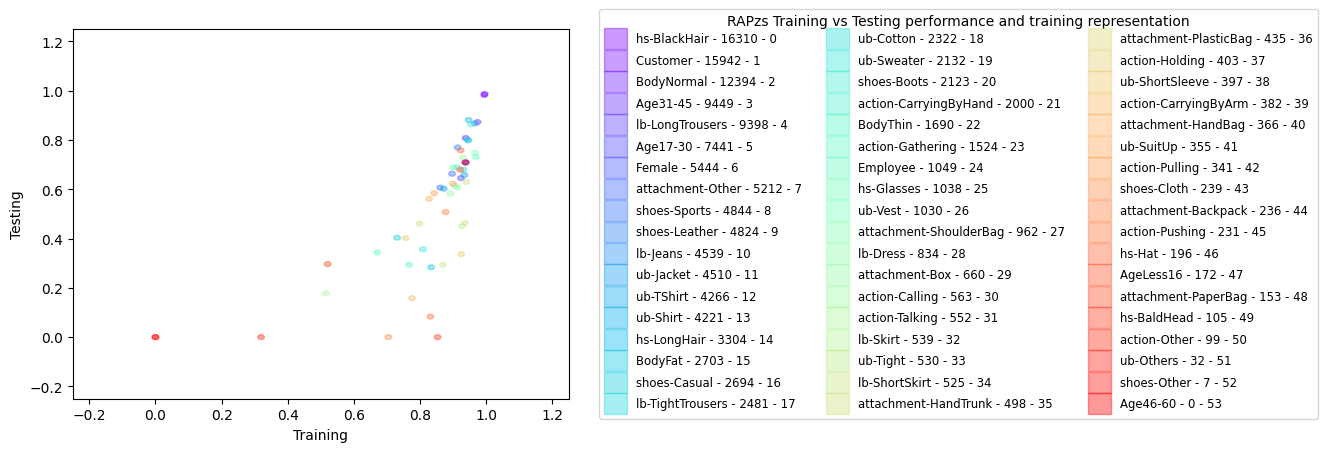

In [33]:
max=tablaAll['training count'].max()

thresholdTesting = 0.4

division = 0.1 / max


xText = 0
yText = 1.2

import numpy as np
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, tablaAll['training count'].count())))



circlesList = []
cont = 0
for attribute in tablaAll.sort_values(by='training count', axis=0, ascending=False)['attribute']:
    x=tablaAll[tablaAll['attribute']==attribute]['perfo training (F1)']
    y=tablaAll[tablaAll['attribute']==attribute]['perfo testing (F1)']
    count = tablaAll[tablaAll['attribute']==attribute]['training count']
    newAttribute = attribute + ' - ' + str(int(count))
    count = division * count
    c = next(color)
    #circle = plt.Circle((x.values[0], y.values[0]), count, color=c, alpha=0.4, label=newAttribute)
    circle = plt.Circle((x.values[0], y.values[0]), 0.01, color=c, alpha=0.4, label=newAttribute+" - "+str(cont))
    
    circlesList.append(circle)
    cont += 1


for circle in circlesList:
    plt.gca().add_patch(circle)

tittle='RAPzs Training vs Testing performance and training representation'
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title=tittle, fontsize='small', fancybox=True, ncol=3,handleheight=2.4, labelspacing=0.05)
plt.xlabel('Training')
plt.ylabel('Testing')
plt.show()

/tmp/ipykernel_2142969/1519844261.py:22: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  newAttribute = attribute + ' - ' + str(int(count))


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

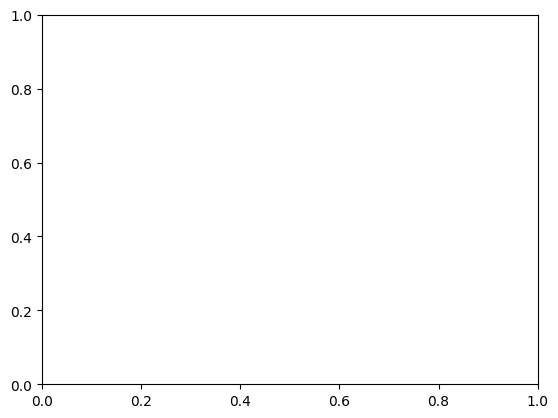

In [34]:
max=tablaAll['training count'].max()

thresholdTesting = 0.4

division = 0.1 / max


xText = 1.0
yText = 1.2

import numpy as np
from matplotlib.pyplot import cm
color = iter(cm.rainbow(np.linspace(0, 1, tablaAll['training count'].count())))



circlesList = []
for attribute in tablaAll.sort_values(by='training count', axis=0, ascending=False)['attribute']:
    x=tablaAll[tablaAll['attribute']==attribute]['perfo training (F1)']
    y=tablaAll[tablaAll['attribute']==attribute]['perfo testing (F1)']
    count = tablaAll[tablaAll['attribute']==attribute]['training count']
    newAttribute = attribute + ' - ' + str(int(count))
    count = division * count
    c = next(color)
    #circle = plt.Circle((x.values[0], y.values[0]), count, color=c, alpha=0.4, label=newAttribute)
    circle = plt.Circle((x.values[0], y.values[0]), 0.01, color=c, alpha=0.4, label=newAttribute)
    circlesList.append(circle)

    if y.values[0] < thresholdTesting:
        plt.plot([xText, x], [yText, y], '-o', color=c, linewidth = '0.5')

        plt.text(xText, yText, attribute)
        yText-=0.09



for circle in circlesList:
    plt.gca().add_patch(circle)

tittle='RAPzs Training vs Testing performance and training representation'
plt.xlim(0,1.25)
plt.ylim(-1,1.25)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title=tittle, fontsize='small', fancybox=True, ncol=3,handleheight=2.4, labelspacing=0.05)
plt.xlabel('Training')
plt.ylabel('Testing')
plt.show()

In [ ]:
##cambiar la grafica anterior